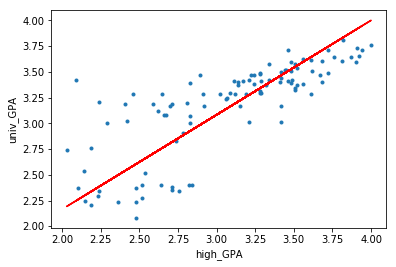

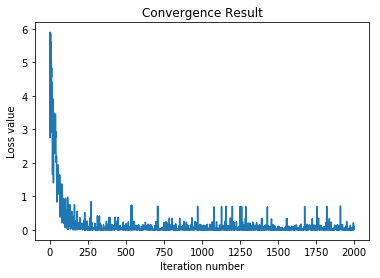

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import random

def LoadData():
    data = np.loadtxt('GPA.txt',skiprows=1)
    data=np.asarray(data)
    X, y = data[:,0].reshape(-1,1), data[:,1].reshape(-1,1)
    return X, y

def LeastSquare(X, y, W):
    N, D = X.shape
    fx = X.dot(W)
    loss = .5/N * np.sum((y - fx)**2)
    dW = -1./N * X.T.dot(y - fx)
    return loss, dW
def TrainLeastSquare(X, y, learning_rate, num_iters, batch_size, flag=False):
    N, D = X.shape
    
    # initialize W
    W = 0.001 * np.random.randn(D, 1)
    
    # save loss 
    loss_history = []
    
    for it in range(num_iters):
        
        mask = np.random.choice(N, batch_size)
        X_batch = X[mask]
        y_batch = y[mask]
        
        loss, dW = LS(X_batch, y_batch, W)
        loss_history.append(float(loss))
        
        # update W
        W += - learning_rate*dW
     
    return loss_history, W

def main():
    X, y=LoadData()
    
    # add bias
    X = np.hstack((X, np.ones((X.shape[0],1))))
    
    sigma = 2
    learning_rate = 1e-3
    reg = 0
    num_iters = 2000
    batch_size = 1
    loss_history, W = TrainLeastSquare(X, y, learning_rate, num_iters, batch_size, flag=True)
    y_p = X.dot(W)
    plt.plot(X[:,0], y, '.')
    plt.plot(X[:,0], y_p, 'r-')
    plt.ylabel('univ_GPA')
    plt.xlabel('high_GPA')
    plt.show()

    
    plt.plot(loss_history)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.title('Convergence Result')
    plt.show()

if __name__ == "__main__":
    main()

    